# Titanic Dataset Exploration

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset_path = os.environ.get('DATASET_PATH')
print(dataset_path)

/Users/jameswilson/Code/datasets


In [5]:
df_titanic = pd.read_csv(os.path.join(dataset_path, 'titanic/train.csv'))

In [6]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Random questions to ask:

1. Is there a strong correlation to missing age and the passenger class?

In [9]:
df_titanic_no_na = df_titanic.dropna(subset=['Age', 'Fare'])

<Axes: xlabel='Age', ylabel='Fare'>

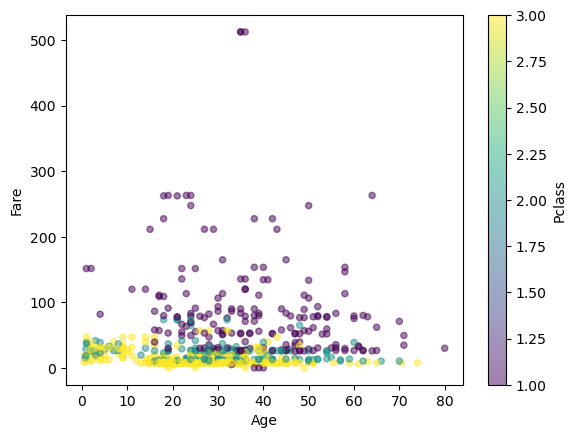

In [10]:
df_titanic_no_na.plot(kind='scatter', x='Age', y='Fare', alpha=0.5, c='Pclass', colormap='viridis')

<Axes: xlabel='Sex'>

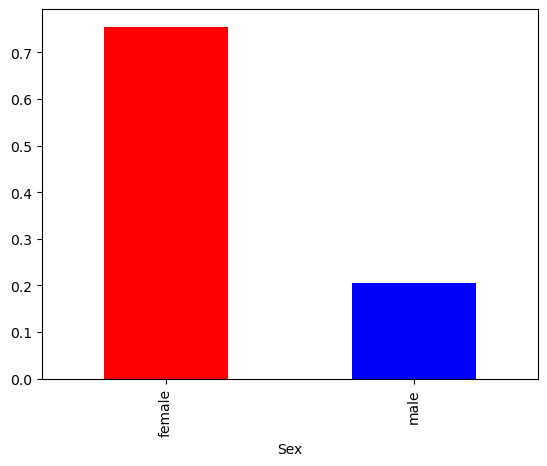

In [11]:
df_titanic_no_na.groupby('Sex')['Survived'].mean().plot(kind='bar', alpha=1.0, color=['r', 'b'])

/var/folders/_1/yxfh7jzx5473_0ljx1bm3_p40000gn/T/ipykernel_5534/3662848655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic_no_na.loc[:, 'Pclass_text'] = df_titanic_no_na['Pclass'].replace({1: 'Third', 2: 'Second', 3: 'First'})


<Axes: xlabel='Pclass_text'>

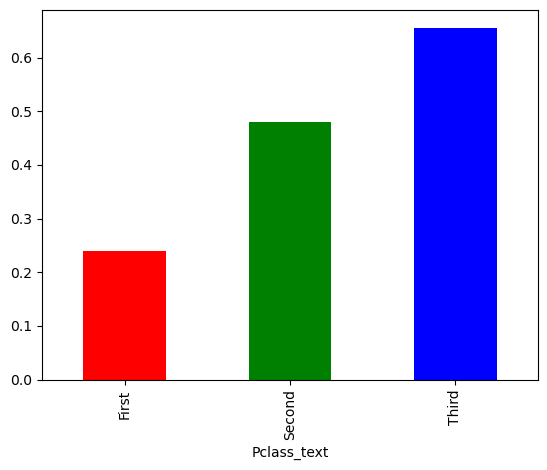

In [12]:
df_titanic_no_na.loc[:, 'Pclass_text'] = df_titanic_no_na['Pclass'].replace({1: 'Third', 2: 'Second', 3: 'First'})
df_titanic_no_na.groupby('Pclass_text')['Survived'].mean().plot(kind='bar', alpha=1.0, color=['r', 'g', 'b'])

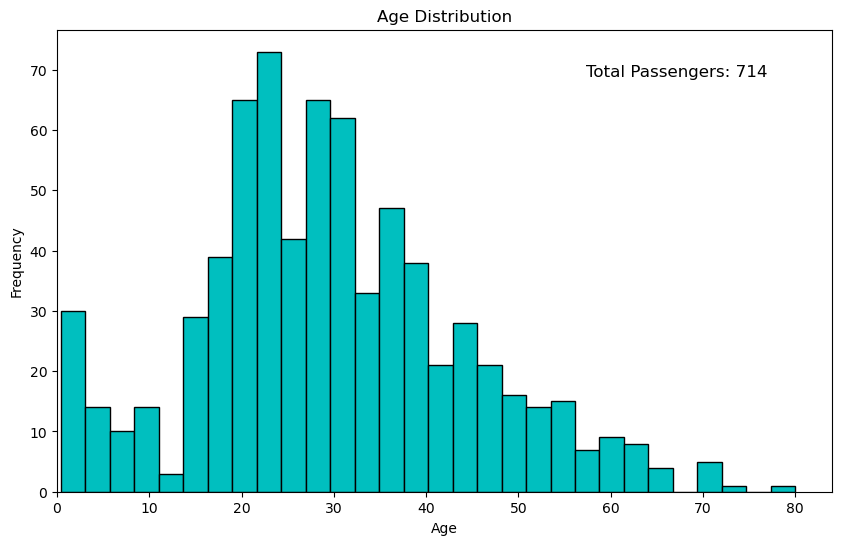

In [13]:
total_passengers = df_titanic_no_na['PassengerId'].nunique()
plt.figure(figsize=(10, 6))
df_titanic_no_na['Age'].dropna().hist(bins=30, color='c', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.annotate(f'Total Passengers: {total_passengers}', xy=(0.8, 0.9), xycoords='axes fraction', ha='center', fontsize=12)
plt.grid(False)
plt.xlim(left=0)  # Set the lower limit of x-axis to 0
plt.show()


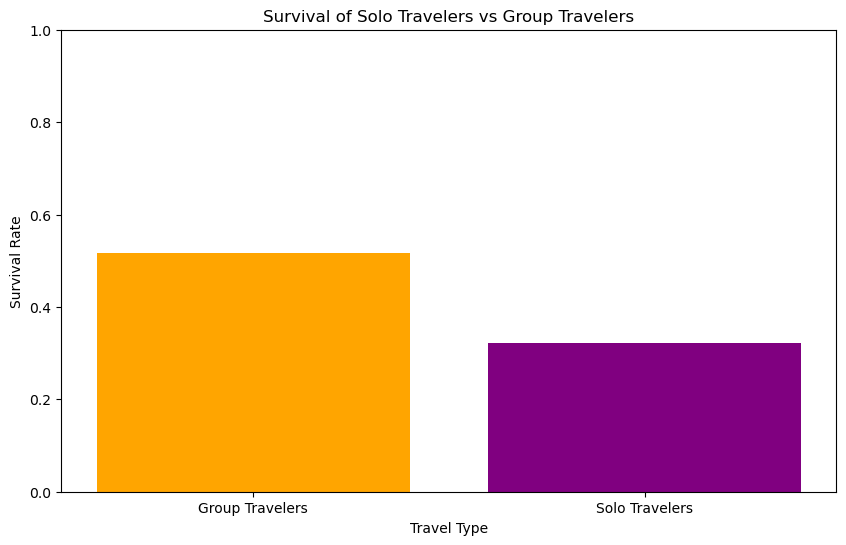

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Survival of Solo Travelers vs Group Travelers')
plt.xlabel('Travel Type')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
survival_rates = df_titanic_no_na.groupby(df_titanic_no_na['SibSp'] + df_titanic_no_na['Parch'] == 0)['Survived'].mean()
plt.bar(['Group Travelers', 'Solo Travelers'], survival_rates, color=['orange', 'purple'])
plt.show()


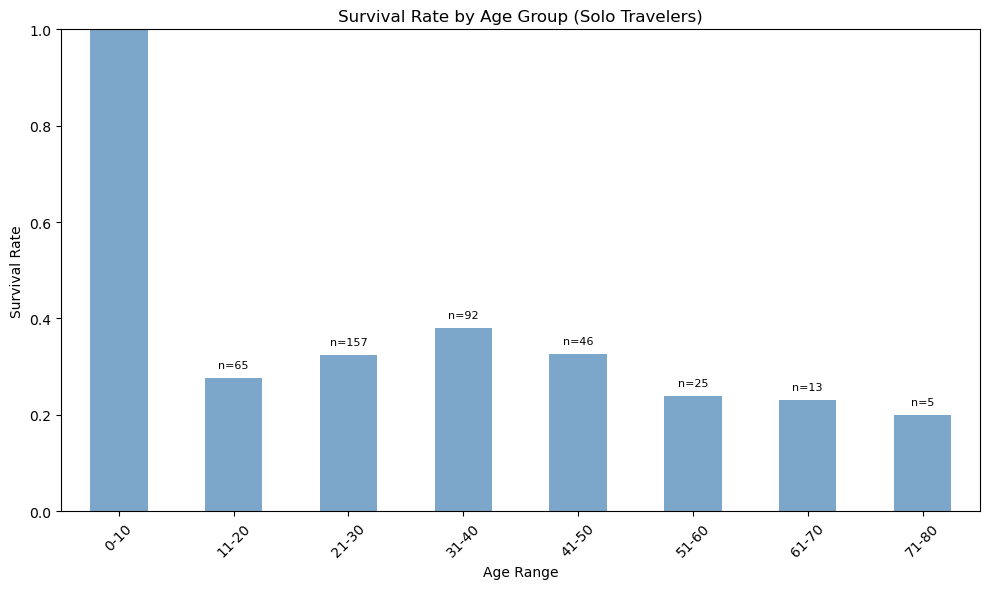

In [23]:
# Survival rate by age bins - clean integer ranges (fixed warnings)
plt.figure(figsize=(10, 6))
solo_travelers = df_titanic_no_na[df_titanic_no_na['SibSp'] + df_titanic_no_na['Parch'] == 0].copy()
solo_travelers['age_bins'] = pd.cut(solo_travelers['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], 
                                   labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
survival_by_age = solo_travelers.groupby('age_bins', observed=True)['Survived'].agg(['mean', 'count'])

survival_by_age['mean'].plot(kind='bar', color='steelblue', alpha=0.7)
plt.title('Survival Rate by Age Group (Solo Travelers)')
plt.xlabel('Age Range')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add count annotations
for i, (rate, count) in enumerate(zip(survival_by_age['mean'], survival_by_age['count'])):
    plt.annotate(f'n={count}', (i, rate + 0.02), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

In [24]:
# Check how many solo travelers were in each age group
print("Solo travelers by age group:")
print(solo_travelers.groupby('age_bins', observed=True).size())
print("\nDetailed breakdown:")
print(solo_travelers.groupby('age_bins', observed=True)['Survived'].agg(['count', 'sum', 'mean']))

Solo travelers by age group:
age_bins
0-10       1
11-20     65
21-30    157
31-40     92
41-50     46
51-60     25
61-70     13
71-80      5
dtype: int64

Detailed breakdown:
          count  sum      mean
age_bins                      
0-10          1    1  1.000000
11-20        65   18  0.276923
21-30       157   51  0.324841
31-40        92   35  0.380435
41-50        46   15  0.326087
51-60        25    6  0.240000
61-70        13    3  0.230769
71-80         5    1  0.200000


In [25]:
# Let's also check what ages we actually have for solo travelers
print("Age range of solo travelers:")
print(f"Min age: {solo_travelers['Age'].min()}")
print(f"Max age: {solo_travelers['Age'].max()}")
print(f"Ages under 11: {solo_travelers[solo_travelers['Age'] <= 10]['Age'].values}")
print(f"Number of solo travelers under 11: {len(solo_travelers[solo_travelers['Age'] <= 10])}")

Age range of solo travelers:
Min age: 5.0
Max age: 80.0
Ages under 11: [5.]
Number of solo travelers under 11: 1


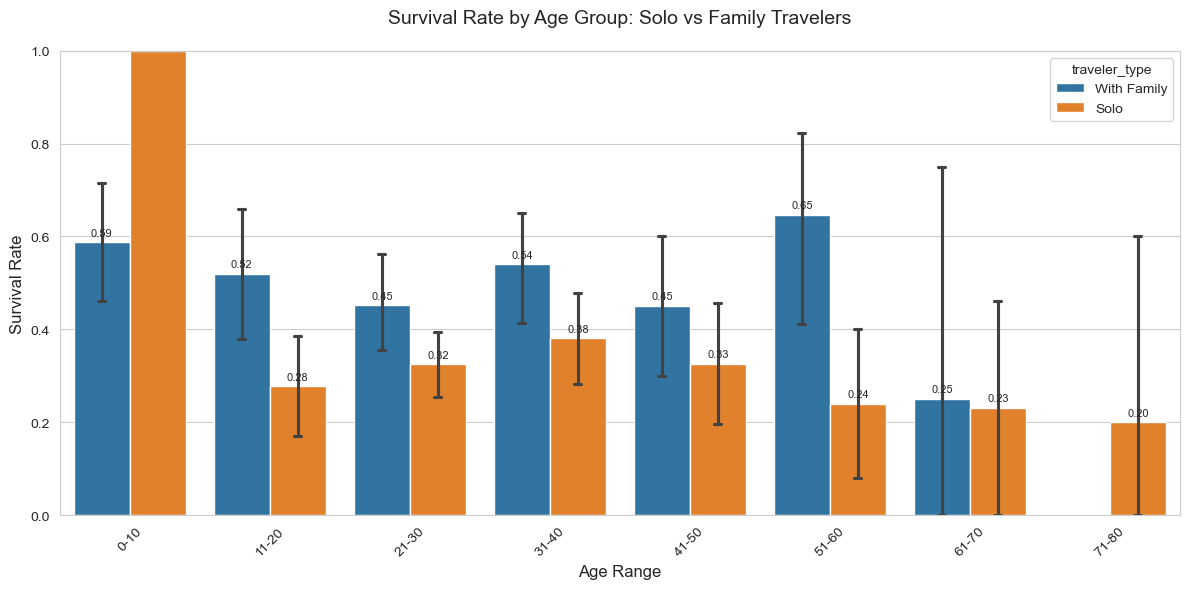

In [34]:
df_analysis = df_titanic_no_na.copy()
df_analysis['traveler_type'] = df_analysis.apply(
    lambda x: 'Solo' if x['SibSp'] + x['Parch'] == 0 else 'With Family', axis=1
)
df_analysis['age_bins'] = pd.cut(df_analysis['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], 
                                labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])


sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=df_analysis, x='age_bins', y='Survived', hue='traveler_type', 
            estimator='mean', errorbar=('ci', 95), capsize=0.1, ax=ax)

ax.set_title('Survival Rate by Age Group: Solo vs Family Travelers', fontsize=14, pad=20)
ax.set_xlabel('Age Range', fontsize=12)
ax.set_ylabel('Survival Rate', fontsize=12)
ax.set_ylim(0, 1)
plt.setp(ax.get_xticklabels(), rotation=45)

# Add sample size annotations
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.2f}', 
                   (p.get_x() + p.get_width()/2., p.get_height() + 0.01),
                   ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

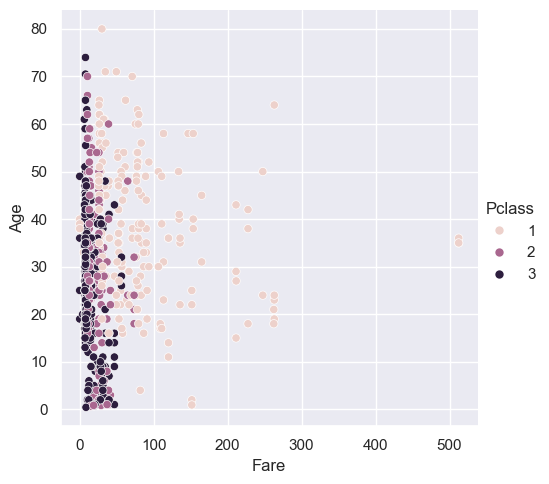

In [40]:
sns.set_theme()
sns.relplot(data=df_titanic_no_na, x='Fare', y='Age', hue='Pclass', kind='scatter')

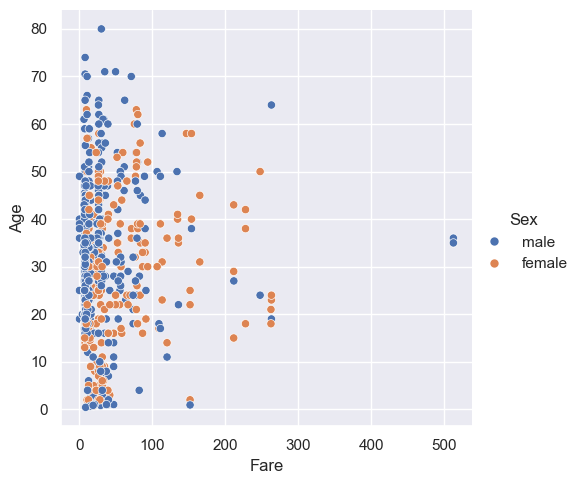

In [42]:
sns.relplot(data=df_titanic_no_na, x='Fare', y='Age', hue='Sex', kind='scatter')

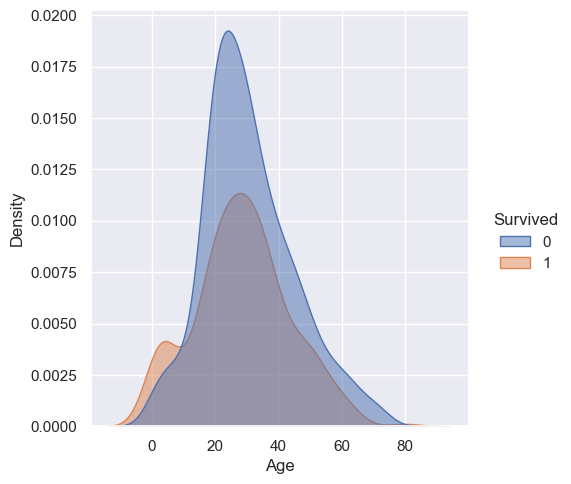

In [43]:
sns.displot(df_titanic_no_na, x='Age', hue='Survived', kind='kde', fill=True, alpha=0.5)

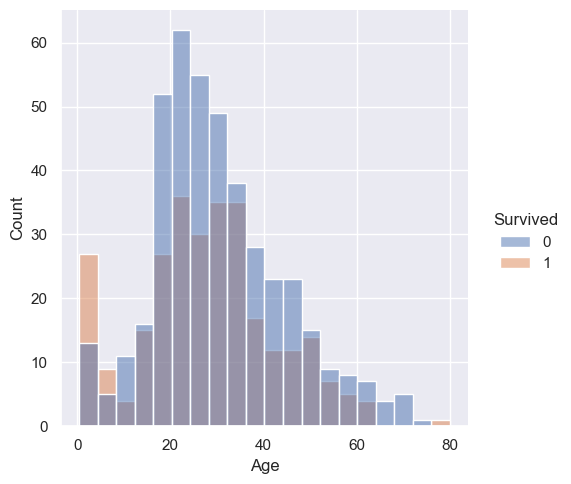

In [44]:
sns.displot(df_titanic_no_na, x='Age', hue='Survived', kind='hist', fill=True, alpha=0.5)

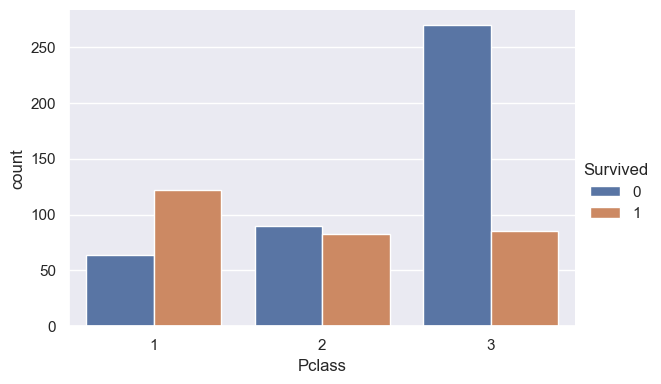

In [46]:
sns.catplot(data=df_titanic_no_na, x='Pclass', hue='Survived', kind='count', height=4, aspect=1.5)

/Users/jameswilson/Code/rebelway/intro_to_ml/unit03_hw/.pixi/envs/default/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jameswilson/Code/rebelway/intro_to_ml/unit03_hw/.pixi/envs/default/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/Users/jameswilson/Code/rebelway/intro_to_ml/unit03_hw/.pixi/envs/default/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


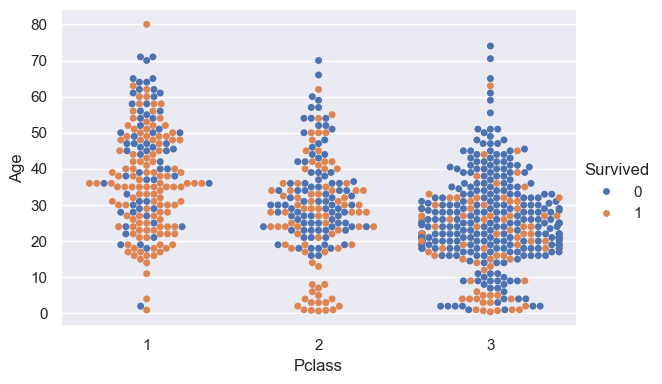

In [47]:
sns.catplot(data=df_titanic_no_na, x='Pclass', y="Age", hue='Survived', kind='swarm', height=4, aspect=1.5)

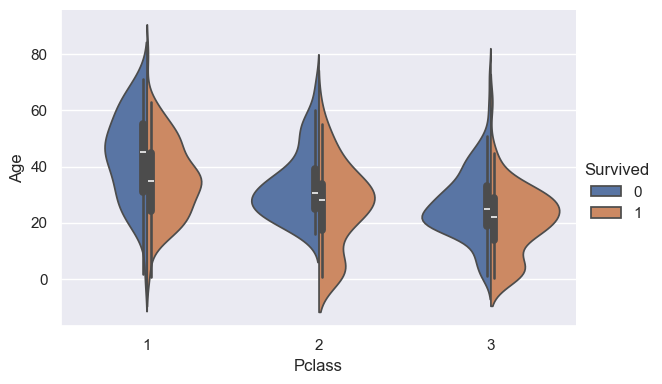

In [51]:
sns.catplot(data=df_titanic_no_na, x='Pclass', y="Age", hue='Survived', kind='violin', height=4, aspect=1.5, split=True)